![](https://datasciencechalktalk.files.wordpress.com/2019/09/cattura.jpg?w=1266)

# Exploratory Data Analysis involves two fundamental steps:
- Data Analysis (Data Pre processing, Cleaning and Manipulation).
- Data Visualisation (Visualise relationships in data using different types of plots).

## Knowledge Discovery in Database (KDD) Process
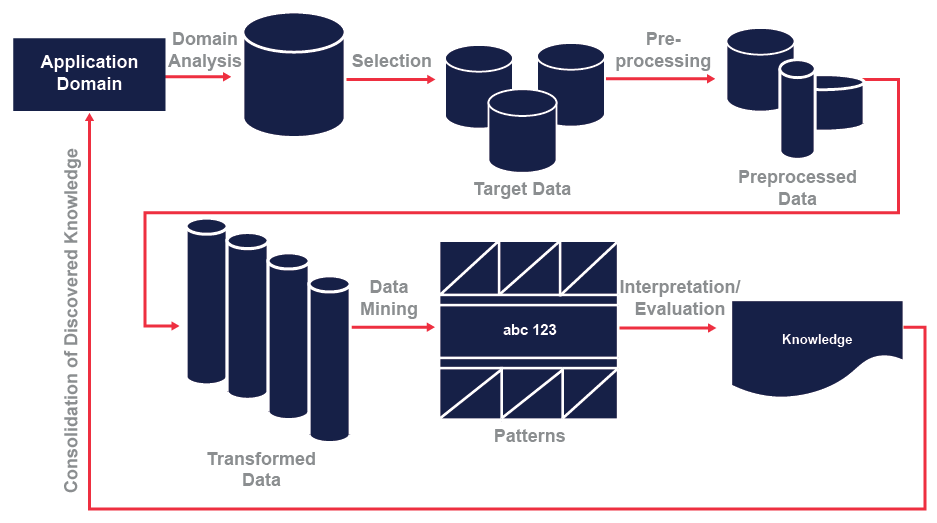

EDA movies data set

link: https://www.kaggle.com/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

In [8]:
import pandas as pd
import numpy as np
#import file dữ liệu
movies = pd.read_csv('imdb_top_1000.csv')

# DATA PRE-PROCESSING

In [9]:
#copy new dataframe
#check null value và variable
print(movies.info(),'\n')
movies_process = movies.copy()

In [47]:
movies_process.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,...,Star3,Star4,No_of_Votes,Gross,Century,Genre1,Genre2,Genre3,certify,Director_string
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,...,Bob Gunton,William Sadler,2343110,28341469,Century20,Drama,NaN,NaN,for_adult,Frank_Darabont
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime,Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,...,James Caan,Diane Keaton,1620367,134966411,Century20,Crime,Drama,NaN,for_adult,Francis_Ford_Coppola
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action,Crime,Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,...,Aaron Eckhart,Michael Caine,2303232,534858444,Century21,Action,Crime,Drama,for_adult,Christopher_Nolan
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime,Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,...,Robert Duvall,Diane Keaton,1129952,57300000,Century20,Crime,Drama,NaN,for_adult,Francis_Ford_Coppola
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime,Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,...,Martin Balsam,John Fiedler,689845,4360000,Century20,Crime,Drama,NaN,all_age,Sidney_Lumet


In [10]:
#xử lý null value
values = {'Certificate':'Unrated','Meta_score':0,'Gross':'0'}
movies_process.fillna(value=values, inplace =True)

In [11]:
print(movies_process['Runtime'][:10])

0    142 min
1    175 min
2    152 min
3    202 min
4     96 min
5    201 min
6    154 min
7    195 min
8    148 min
9    139 min
Name: Runtime, dtype: object


In [12]:
#xóa chữ min và convert thành dạng số cho trường Runtime
movies_process['Runtime']=movies_process['Runtime'].str.replace('min','')
movies_process['Runtime']=movies_process['Runtime'].astype(str).astype(int)
print(movies_process['Runtime'][:10])

0    142
1    175
2    152
3    202
4     96
5    201
6    154
7    195
8    148
9    139
Name: Runtime, dtype: int32


In [13]:
print(movies_process['Released_Year'].drop_duplicates())
#loại bỏ dòng có giá trị năm sai (PG) và convert từ string thành số
movies_process = movies_process[movies_process['Released_Year']!='PG']
movies_process['Released_Year'] = movies_process['Released_Year'].astype(str).astype(int)
print(movies_process['Released_Year'].drop_duplicates())

0      1994
1      1972
2      2008
3      1974
4      1957
       ... 
566    1933
567    1932
568    1922
712    1943
966      PG
Name: Released_Year, Length: 100, dtype: object
0      1994
1      1972
2      2008
3      1974
4      1957
       ... 
565    1935
566    1933
567    1932
568    1922
712    1943
Name: Released_Year, Length: 99, dtype: int32


In [14]:
print(movies_process['Gross'][:5])
#convert trường Gross từ string thành số 
movies_process['Gross']=movies_process['Gross'].str.replace(',','')
movies_process['Gross']=movies_process['Gross'].astype(str).astype(int)
print(movies_process['Gross'][:5])

0     28,341,469
1    134,966,411
2    534,858,444
3     57,300,000
4      4,360,000
Name: Gross, dtype: object
0     28341469
1    134966411
2    534858444
3     57300000
4      4360000
Name: Gross, dtype: int32


In [15]:
#tạo một trường dữ liệu mới dựa trên trường Released_Year
conditions = [movies_process['Released_Year'] < 2000, movies_process['Released_Year'] >= 2000]
values = ['Century20','Century21'] 
movies_process['Century'] = np.select(conditions, values)
print(movies_process[['Century','Released_Year']].drop_duplicates())


       Century  Released_Year
0    Century20           1994
1    Century20           1972
2    Century21           2008
3    Century20           1974
4    Century20           1957
..         ...            ...
565  Century20           1935
566  Century20           1933
567  Century20           1932
568  Century20           1922
712  Century20           1943

[99 rows x 2 columns]


In [18]:
movies_process['Genre']

0                         Drama
1                  Crime, Drama
2          Action, Crime, Drama
3                  Crime, Drama
4                  Crime, Drama
                 ...           
995      Comedy, Drama, Romance
996              Drama, Western
997         Drama, Romance, War
998                  Drama, War
999    Crime, Mystery, Thriller
Name: Genre, Length: 999, dtype: object

In [19]:
#tạo trường Gerne123 dựa trên trường Gerne
movies_process['Genre']=movies_process['Genre'].str.replace(' ','')
movies_process['Genre1']=movies_process['Genre'].str.split(',').str[0]
movies_process['Genre2']=movies_process['Genre'].str.split(',').str[1]
movies_process['Genre3']=movies_process['Genre'].str.split(',').str[2]

print(movies_process[['Genre','Genre1','Genre2','Genre3']].drop_duplicates())

                       Genre     Genre1     Genre2   Genre3
0                      Drama      Drama        NaN      NaN
1                Crime,Drama      Crime      Drama      NaN
2         Action,Crime,Drama     Action      Crime    Drama
5     Action,Adventure,Drama     Action  Adventure    Drama
7    Biography,Drama,History  Biography      Drama  History
..                       ...        ...        ...      ...
927  Action,Adventure,Family     Action  Adventure   Family
951     Action,Crime,Mystery     Action      Crime  Mystery
971  Animation,Drama,Romance  Animation      Drama  Romance
990        Drama,War,Western      Drama        War  Western
991     Adventure,Comedy,War  Adventure     Comedy      War

[202 rows x 4 columns]


# VISUALIZATION AND MANIPULATE DATA

In [20]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib notebook

BOXPLOT VA HISTOGRAM

In [21]:
print(movies_process['Runtime'].max())

321


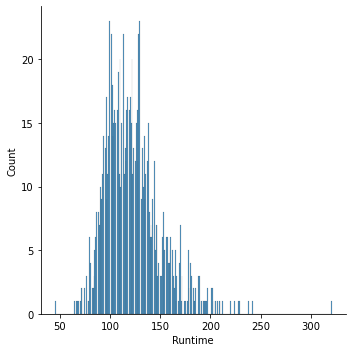

In [26]:
%matplotlib inline
sns.displot(movies_process['Runtime'],bins=321) #bins=321
plt.show()

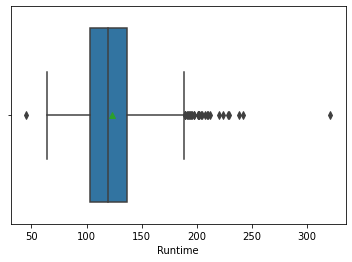

In [24]:
#boxplot
sns.boxplot(x=movies_process['Runtime'],showmeans=True)
plt.show()

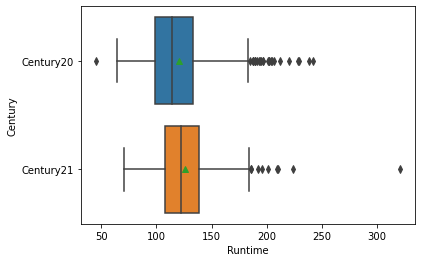

In [28]:
#multiple boxplot
sns.boxplot(x=movies_process['Runtime'],y=movies_process['Century'],showmeans=True)
plt.show()

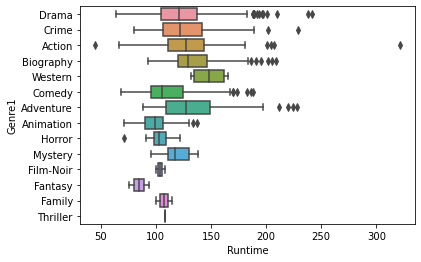

In [29]:
sns.boxplot(x=movies_process['Runtime'],y=movies_process['Genre1'])
#plt.xticks(rotation=45)
plt.show()

In [30]:
#create data for barchart
df_barchart=movies_process.groupby('Genre1')['Genre1'].count() #tạo 1 series đếm số lượng movies
df_barchart.rename('Number of movies',inplace=True) #đặt tên cho trường dữ liệu
df_barchart =pd.DataFrame(df_barchart) #convert series thành dataframe
df_barchart.reset_index(inplace=True) #chuyển index Genre thành 1 trường dữ liệu

df_barchart.head()

,Genre1,Number of movies
0,Action,172
1,Adventure,71
2,Animation,82
3,Biography,88
4,Comedy,155


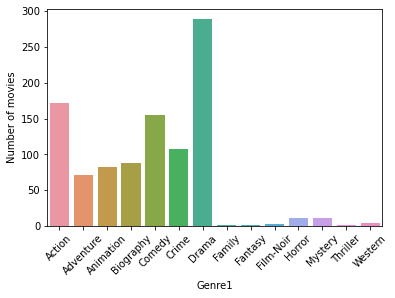

In [31]:
#barchart
sns.barplot(data=df_barchart,x='Genre1',y='Number of movies')
plt.xticks(rotation=45)
plt.show()

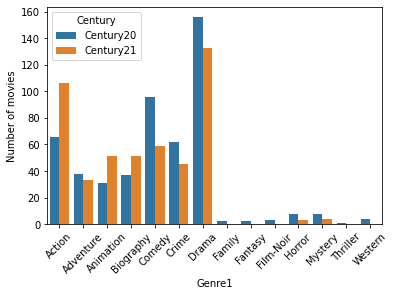

In [32]:
#multiple barchar
#create data for barchart. count number movies by Genre1 và Century
df_barchart=movies_process.groupby(['Genre1','Century'])['Genre1'].count()
df_barchart.rename('Number of movies',inplace=True)
df_barchart =pd.DataFrame(df_barchart)
df_barchart.reset_index(inplace=True)

sns.barplot(x='Genre1',y='Number of movies', hue="Century", data=df_barchart)
plt.xticks(rotation=45)
plt.show()

In [33]:
#stacked barchart
#create data for stacked barchart
df_barchart_stack=pd.pivot_table(df_barchart,values='Number of movies', index='Genre1',
                    columns='Century')
df_barchart_stack.reset_index(inplace=True)
df_barchart_stack.fillna(0,inplace=True)
print(df_barchart.head())
print(df_barchart_stack.head())

      Genre1    Century  Number of movies
0     Action  Century20                66
1     Action  Century21               106
2  Adventure  Century20                38
3  Adventure  Century21                33
4  Animation  Century20                31
Century     Genre1  Century20  Century21
0           Action       66.0      106.0
1        Adventure       38.0       33.0
2        Animation       31.0       51.0
3        Biography       37.0       51.0
4           Comedy       96.0       59.0


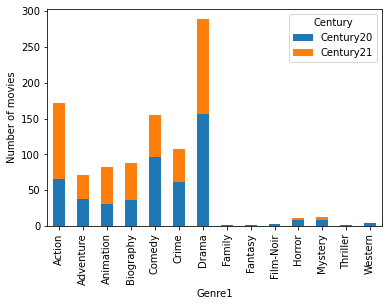

In [34]:
#stacked barchart
df_barchart_stack.plot(x='Genre1',kind='bar',stacked=True)
plt.ylabel('Number of movies')
plt.show()

In [35]:
#proportion between Century20 và 21 by Genre1
df_barchart_stack.set_index('Genre1',inplace=True)
df_barchart_stack = df_barchart_stack.apply(lambda x: x*100/sum(x),axis=1) #axis=1 tính theo dòng
df_barchart_stack.reset_index(inplace=True)
print(df_barchart_stack.head())

Century     Genre1  Century20  Century21
0           Action  38.372093  61.627907
1        Adventure  53.521127  46.478873
2        Animation  37.804878  62.195122
3        Biography  42.045455  57.954545
4           Comedy  61.935484  38.064516


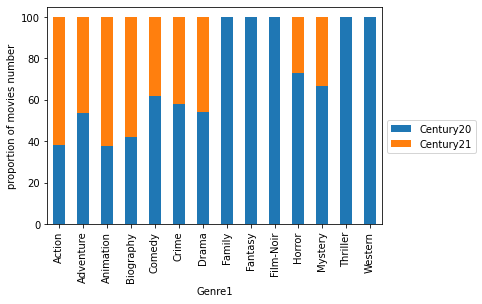

In [36]:
df_barchart_stack.plot(x='Genre1',kind='bar',stacked=True) #color=['orange','blue']
plt.ylabel('proportion of movies number')
plt.legend(bbox_to_anchor = (1, 0.5))
plt.show()

In [38]:
#create data for linechart:
df_linechart=movies_process.groupby('Released_Year')['IMDB_Rating'].mean()# tính điểm IMDB trung bình theo năm 
df_linechart.rename('AVG_IMDB_Rating',inplace=True) #thay đổi tên trường
df_linechart =pd.DataFrame(df_linechart) #convert thành dataframe
df_linechart.reset_index(inplace=True) #chuyển trường năm đang là index thành 1 trường dữ liệu
print(df_linechart.head())

   Released_Year  AVG_IMDB_Rating
0           1920              8.1
1           1921              8.3
2           1922              7.9
3           1924              8.2
4           1925              8.1


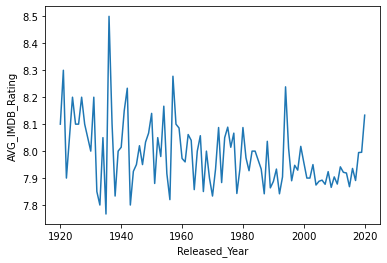

In [39]:
#plotting by seaborn
sns.lineplot(data=df_linechart, x="Released_Year", y="AVG_IMDB_Rating")
plt.show()

In [40]:
movies_process['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', 'Unrated', 'PG', 'G', 'Passed',
       'TV-14', '16', 'TV-MA', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [41]:
#tạo dataframe cho pie chart
#tạo trường phân loại for_adult và all_age dựa trên trường Certificate
all_age = ['U','G']
for_adult = ['A','U/A','UA','A','GP','PG','PG-13','R','TV-14','TV-MA','TV-PG']
certified = all_age+for_adult

conditions = [movies_process['Certificate'].isin(all_age), movies_process['Certificate'].isin(for_adult),
              ~movies_process['Certificate'].isin(certified)] #isin(list)
values = ['all_age','for_adult','non-certify']

movies_process['certify'] = np.select(conditions, values)

movies_process[['Certificate','certify']].drop_duplicates().sort_values(by='certify')

,Certificate,certify
4,U,all_age
51,G,all_age
0,A,for_adult
2,UA,for_adult
18,PG-13,for_adult
24,R,for_adult
32,PG,for_adult
91,TV-14,for_adult
198,TV-MA,for_adult
287,GP,for_adult


In [42]:
#tạo data cho pie chart
df_piechart=pd.pivot_table(movies_process,values='Gross', index='certify',
                    columns='Century', aggfunc=np.sum) #np.count_nonzero, index là dòng, 
df_piechart.reset_index(inplace=True)
df_piechart.head()

Century,certify,Century20,Century21
0,all_age,8.350375e+09,9.421066e+09
1,for_adult,1.040910e+10,2.784734e+10
2,non-certify,3.271976e+08,7.960056e+06


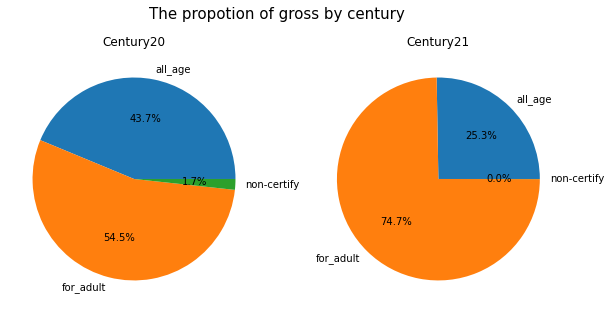

In [43]:
#pie chart
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('The propotion of gross by century',fontsize=15)

ax1.pie(df_piechart['Century20'], labels=df_piechart['certify'], autopct='%1.1f%%')#laels: trường dữ liệu phân loại
ax1.set_title('Century20')

ax2.pie(df_piechart['Century21'], labels=df_piechart['certify'], autopct='%1.1f%%')
ax2.set_title('Century21')

plt.show()

In [44]:
movies_process.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross', 'Century',
       'Genre1', 'Genre2', 'Genre3', 'certify'],
      dtype='object')

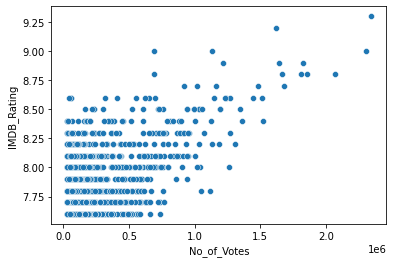

0.4953605676045328


In [45]:
#scatter plot
#fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(13,5))
sns.scatterplot(x=movies_process['No_of_Votes'], y=movies_process['IMDB_Rating'],data=movies_process)
plt.show()
correlation = movies_process['IMDB_Rating'].corr(movies_process['No_of_Votes'])
print(correlation)
#if correlation = 1

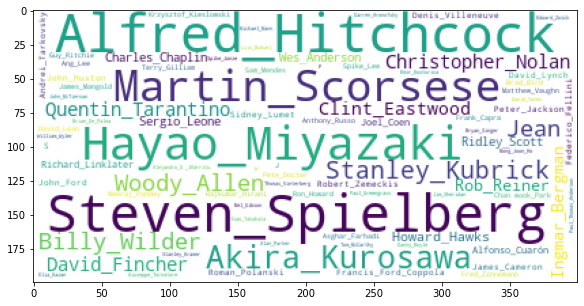

In [46]:
from wordcloud import WordCloud
#word cloud for director name
#set data for word cloud
movies_process['Director_string'] = movies_process['Director'].str.replace(' ','_') #gộp first và last name
director = movies_process['Director_string'].tolist() #convert series to list
director_string = " ".join(director) #convert to string

#plotting
plt.figure(figsize = (10,5))
plt.imshow(WordCloud(background_color='white').generate(director_string))
plt.show()